In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as ny # linear algebra
import pandas as ps # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Regression**

In [2]:

xtrain = ny.linspace(-1, 1, 40)
xtrain

array([-1.        , -0.94871795, -0.8974359 , -0.84615385, -0.79487179,
       -0.74358974, -0.69230769, -0.64102564, -0.58974359, -0.53846154,
       -0.48717949, -0.43589744, -0.38461538, -0.33333333, -0.28205128,
       -0.23076923, -0.17948718, -0.12820513, -0.07692308, -0.02564103,
        0.02564103,  0.07692308,  0.12820513,  0.17948718,  0.23076923,
        0.28205128,  0.33333333,  0.38461538,  0.43589744,  0.48717949,
        0.53846154,  0.58974359,  0.64102564,  0.69230769,  0.74358974,
        0.79487179,  0.84615385,  0.8974359 ,  0.94871795,  1.        ])

In [3]:
ytrain = ny.random.uniform(low = -1, high = 1, size=(40,))
ytrain

array([ 0.44308304,  0.36374081,  0.44815429, -0.63257167, -0.16997282,
        0.85600051, -0.88196096, -0.25821123,  0.12497761,  0.36955788,
        0.60028584, -0.1616498 , -0.37520986,  0.68090528, -0.87634349,
       -0.53566376, -0.61999561, -0.68003045, -0.20808415, -0.94633883,
       -0.29360104, -0.31288404,  0.85362505,  0.41417406,  0.00767984,
       -0.91403463, -0.53174049,  0.44981292,  0.65880179,  0.8168572 ,
        0.48952447, -0.2472994 ,  0.11352782,  0.06584658, -0.48482217,
       -0.44279686,  0.84001156, -0.47911077, -0.76489561, -0.54769414])

In [4]:
xtest = ny.linspace(-1, 1, 40)
xtest

array([-1.        , -0.94871795, -0.8974359 , -0.84615385, -0.79487179,
       -0.74358974, -0.69230769, -0.64102564, -0.58974359, -0.53846154,
       -0.48717949, -0.43589744, -0.38461538, -0.33333333, -0.28205128,
       -0.23076923, -0.17948718, -0.12820513, -0.07692308, -0.02564103,
        0.02564103,  0.07692308,  0.12820513,  0.17948718,  0.23076923,
        0.28205128,  0.33333333,  0.38461538,  0.43589744,  0.48717949,
        0.53846154,  0.58974359,  0.64102564,  0.69230769,  0.74358974,
        0.79487179,  0.84615385,  0.8974359 ,  0.94871795,  1.        ])

In [5]:
ytest = ny.random.uniform(low = -1, high = 1, size=(40,))
ytest

array([ 0.50747211,  0.20381759,  0.96808176, -0.20323836,  0.22803364,
        0.75324991, -0.44213868, -0.30656368, -0.43885666,  0.57432411,
        0.58885883,  0.92815796, -0.10540534,  0.19168802,  0.00119945,
       -0.50576351,  0.54030944,  0.8158696 ,  0.92724771,  0.62435325,
        0.60989837,  0.00711409, -0.81747631,  0.70836682, -0.57952971,
       -0.20660023,  0.01523274,  0.9499242 ,  0.47624032, -0.99262566,
        0.59277286,  0.54618787,  0.41691054, -0.62637193,  0.49907824,
        0.87204537, -0.20217073, -0.65443008,  0.96584028, -0.94184077])

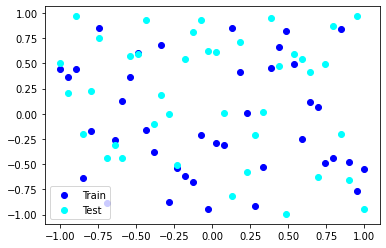

In [6]:
plt.scatter(xtrain, ytrain, c = 'blue', label = 'Train')
plt.scatter(xtest, ytest, c = 'cyan', label = 'Test')
plt.legend()
plt.show()

In [7]:
model = Sequential()

model.add(Dense(128, input_dim = 1, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
adam = Adam(learning_rate = 0.01)
model.compile(loss = 'mse', optimizer = adam, metrics = ['mse'])
traininglog = model.fit(xtrain, ytrain, epochs = 500, validation_data = (xtest, ytest), verbose = True)



2022-12-28 00:23:50.242628: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-12-28 00:23:50.363988: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/500
2/2 [==============================] - 1s 239ms/step - loss: 0.4904 - mse: 0.4904 - val_loss: 0.4229 - val_mse: 0.4229
Epoch 2/500
2/2 [==============================] - 0s 42ms/step - loss: 0.3188 - mse: 0.3188 - val_loss: 0.3629 - val_mse: 0.3629
Epoch 3/500
2/2 [==============================] - 0s 42ms/step - loss: 0.3192 - mse: 0.3192 - val_loss: 0.3694 - val_mse: 0.3694
Epoch 4/500
2/2 [==============================] - 0s 40ms/step - loss: 0.3119 - mse: 0.3119 - val_loss: 0.4042 - val_mse: 0.4042
Epoch 5/500
2/2 [==============================] - 0s 41ms/step - loss: 0.3148 - mse: 0.3148 - val_loss: 0.4416 - val_mse: 0.4416
Epoch 6/500
2/2 [==============================] - 0s 39ms/step - loss: 0.3112 - mse: 0.3112 - val_loss: 0.4086 - val_mse: 0.4086
Epoch 7/500
2/2 [==============================] - 0s 42ms/step - loss: 0.3047 - mse: 0.3047 - val_loss: 0.3854 - val_mse: 0.3854
Epoch 8/500
2/2 [==============================] - 0s 43ms/step - loss: 0.3085 - mse: 0.3

In [8]:
_, train_mse = model.evaluate(xtrain, ytrain, verbose = 0)
_, test_mse = model.evaluate(xtest, ytest, verbose = 0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.15721413493156433, Test: 0.5473315715789795


In [9]:
yprediction = model.predict(xtest)

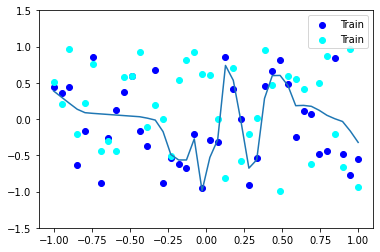

In [10]:
plt.figure()
plt.scatter(xtrain, ytrain, c = 'blue', label = 'Train')
plt.scatter(xtest, ytest, c = 'cyan', label = 'Train')
plt.plot(xtest, yprediction)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

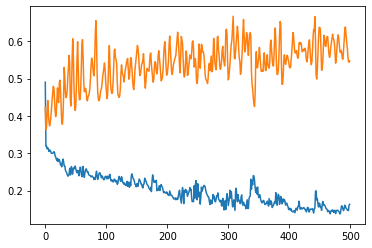

In [11]:
plt.plot(traininglog.history['loss'])
plt.plot(traininglog.history['val_loss'])

In [12]:
model = Sequential()

model.add(Dense(128, input_dim = 1, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'linear'))
adam = Adam(learning_rate = 0.01)
model.compile(loss = 'mse', optimizer = adam, metrics = ['mse'])
traininglog = model.fit(xtrain, ytrain, epochs = 500, validation_data = (xtest, ytest), verbose = True)


Epoch 1/500
2/2 [==============================] - 1s 190ms/step - loss: 0.3251 - mse: 0.3251 - val_loss: 0.3525 - val_mse: 0.3525
Epoch 2/500
2/2 [==============================] - 0s 41ms/step - loss: 0.3374 - mse: 0.3374 - val_loss: 0.4304 - val_mse: 0.4304
Epoch 3/500
2/2 [==============================] - 0s 41ms/step - loss: 0.3136 - mse: 0.3136 - val_loss: 0.3630 - val_mse: 0.3630
Epoch 4/500
2/2 [==============================] - 0s 40ms/step - loss: 0.3055 - mse: 0.3055 - val_loss: 0.3577 - val_mse: 0.3577
Epoch 5/500
2/2 [==============================] - 0s 42ms/step - loss: 0.3460 - mse: 0.3460 - val_loss: 0.3977 - val_mse: 0.3977
Epoch 6/500
2/2 [==============================] - 0s 42ms/step - loss: 0.3052 - mse: 0.3052 - val_loss: 0.4385 - val_mse: 0.4385
Epoch 7/500
2/2 [==============================] - 0s 41ms/step - loss: 0.2885 - mse: 0.2885 - val_loss: 0.4325 - val_mse: 0.4325
Epoch 8/500
2/2 [==============================] - 0s 45ms/step - loss: 0.3020 - mse: 0.3

In [13]:
_, train_mse = model.evaluate(xtrain, ytrain, verbose = 0)
_, test_mse = model.evaluate(xtest, ytest, verbose = 0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.2394023835659027, Test: 0.47681766748428345


In [14]:
yprediction = model.predict(xtest)

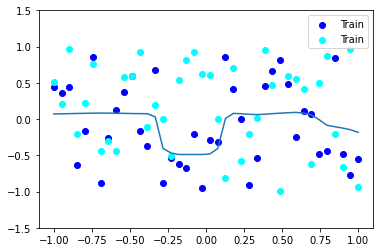

In [15]:
plt.figure()
plt.scatter(xtrain, ytrain, c = 'blue', label = 'Train')
plt.scatter(xtest, ytest, c = 'cyan', label = 'Train')
plt.plot(xtest, yprediction)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

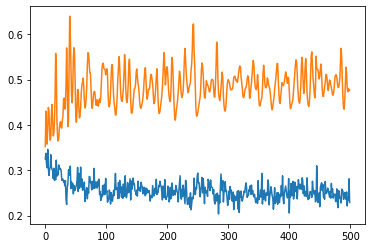

In [16]:
plt.plot(traininglog.history['loss'])
plt.plot(traininglog.history['val_loss'])

**Classification**

In [17]:
x = ny.array([[-1.58986e-01,  4.23977e-01],
       [-3.47926e-01,  4.70760e-01],
       [-5.04608e-01,  3.53801e-01],
       [-5.96774e-01,  1.14035e-01],
       [-5.18433e-01, -1.72515e-01],
       [-2.92627e-01, -2.07602e-01],
       [-1.58986e-01, -4.38596e-02],
       [-5.76037e-02,  1.43275e-01],
       [-7.14286e-02,  2.71930e-01],
       [-2.97235e-01,  3.47953e-01],
       [-4.17051e-01,  2.01754e-01],
       [-4.40092e-01,  8.77193e-03],
       [-3.24885e-01, -3.21637e-02],
       [-2.46544e-01,  5.55556e-02],
       [-2.18894e-01,  2.01754e-01],
       [-3.43318e-01,  1.60819e-01],
       [-5.09217e-01,  7.89474e-02],
       [-3.84793e-01, -9.06433e-02],
       [-1.49770e-01,  1.25731e-01],
       [-1.95853e-01,  3.24561e-01],
       [-3.91705e-02, -2.19298e-01],
       [-1.08295e-01, -3.01170e-01],
       [-1.86636e-01, -3.30409e-01],
       [-2.18894e-01, -4.23977e-01],
       [-8.06452e-02, -5.64327e-01],
       [ 6.68203e-02, -5.17544e-01],
       [ 9.44700e-02, -3.24561e-01],
       [ 1.86636e-01, -1.66667e-01],
       [ 6.22120e-02, -7.30994e-02],
       [ 2.07373e-02, -1.95906e-01],
       [ 2.99539e-02, -3.42105e-01],
       [-9.90783e-02, -3.77193e-01],
       [-6.91244e-03, -4.64912e-01],
       [ 1.31336e-01, -4.29825e-01],
       [ 2.32719e-01, -1.95906e-01],
       [ 8.52535e-02, -8.47953e-02],
       [-1.31336e-01, -2.36842e-01],
       [ 2.30415e-03, -1.25731e-01],
       [ 1.22120e-01, -2.92398e-03],
       [-3.47926e-01, -3.12865e-01],
       [-2.28111e-01, -1.25731e-01],
       [-7.60369e-02,  1.46199e-02],
       [ 4.37788e-02,  2.04678e-02],
       [ 1.15207e-02,  1.54971e-01],
       [-4.17051e-01, -1.60819e-01],
       [-3.15668e-01, -3.18713e-01],
       [ 1.26728e-01, -2.19298e-01],
       [ 2.05069e-01, -3.12865e-01],
       [ 2.18894e-01, -4.59064e-01],
       [ 7.14286e-02, -6.46199e-01],
       [-1.31336e-01, -6.05263e-01],
       [-2.09677e-01, -5.81871e-01],
       [-2.28111e-01, -4.29825e-01],
       [-1.45161e-01, -4.12281e-01],
       [-6.68203e-02, -4.82456e-01],
       [ 1.35945e-01, -5.11696e-01],
       [ 2.69585e-01, -4.06433e-01],
       [ 2.97235e-01, -2.95322e-01],
       [ 2.74194e-01, -1.72515e-01],
       [ 2.55760e-01, -4.97076e-02],
       [ 2.23502e-01, -4.97076e-02],
       [ 1.82028e-01, -8.47953e-02],
       [ 1.58986e-01, -1.54971e-01],
       [ 7.14286e-02, -2.13450e-01],
       [ 1.61290e-02, -2.66082e-01],
       [-2.53456e-02, -3.83041e-01],
       [-1.15207e-02, -4.82456e-01],
       [-2.30415e-03, -5.05848e-01],
       [ 2.53456e-02, -5.11696e-01],
       [ 2.53456e-02, -5.58480e-01],
       [ 1.15207e-02, -6.57895e-01],
       [-4.83871e-02, -6.46199e-01],
       [-8.52535e-02, -5.52632e-01],
       [-9.90783e-02, -5.00000e-01],
       [-1.61290e-02, -4.23977e-01],
       [ 1.31336e-01, -3.59649e-01],
       [ 2.23502e-01, -3.71345e-01],
       [ 2.92627e-01, -3.01170e-01],
       [ 2.60369e-01, -2.07602e-01],
       [ 2.00461e-01, -2.25146e-01],
       [ 1.72811e-01, -2.71930e-01],
       [-1.31336e-01,  9.06433e-02],
       [-1.49770e-01,  7.30994e-02],
       [-2.41935e-01,  6.14035e-02],
       [-3.01843e-01,  1.78363e-01],
       [-2.97235e-01,  1.95906e-01],
       [-2.74194e-01,  3.07018e-01],
       [-3.24885e-01,  2.95322e-01],
       [-3.98618e-01,  2.66082e-01],
       [-4.35484e-01,  1.60819e-01],
       [-4.72350e-01,  7.89474e-02],
       [-3.38710e-01,  4.38596e-02],
       [-2.69585e-01,  4.38596e-02],
       [-2.55760e-01,  1.02339e-01],
       [-1.68203e-01,  2.66082e-01],
       [-1.12903e-01,  3.01170e-01],
       [-3.91705e-02,  3.47953e-01],
       [-1.26728e-01,  4.41520e-01],
       [-2.32719e-01,  4.41520e-01],
       [-3.38710e-01,  4.18129e-01],
       [-4.12442e-01,  3.53801e-01],
       [-5.09217e-01,  2.19298e-01],
       [-5.41475e-01,  1.46199e-02],
       [-5.04608e-01, -1.25731e-01],
       [-4.90783e-01, -1.43275e-01],
       [-3.61751e-01, -1.37427e-01],
       [-2.69585e-01, -8.47953e-02],
       [-2.23502e-01, -7.89474e-02],
       [-1.86636e-01, -3.80117e-02],
       [-1.54378e-01, -8.77193e-03],
       [-1.12903e-01,  5.55556e-02],
       [-8.52535e-02,  1.37427e-01],
       [-8.52535e-02,  2.77778e-01],
       [-1.68203e-01,  3.01170e-01],
       [-1.91244e-01,  1.95906e-01],
       [-1.40553e-01, -4.97076e-02],
       [-2.99539e-02,  6.72515e-02],
       [-2.00461e-01, -2.30994e-01],
       [-1.08295e-01, -8.47953e-02],
       [ 3.45622e-02,  6.72515e-02],
       [ 8.06452e-02,  1.19883e-01],
       [-3.85369e-01,  3.30409e-02],
       [-3.81221e-01,  1.31287e-01],
       [-3.52189e-01,  2.58187e-01],
       [-3.54263e-01,  3.64620e-01],
       [-4.14401e-01, -6.92982e-02],
       [-4.99424e-01, -3.24561e-02],
       [-2.98272e-01, -9.79532e-02],
       [-3.16935e-01, -1.83918e-01],
       [-3.68779e-01, -2.90351e-01],
       [-3.56336e-01, -3.96784e-01],
       [-2.71313e-01,  4.38596e-03],
       [-1.77995e-01,  8.62573e-02],
       [-2.46429e-01,  1.43567e-01],
       [-2.50576e-01,  2.29532e-01],
       [-2.21544e-01,  3.76901e-01],
       [-2.15323e-01,  2.95029e-01],
       [-1.30300e-01,  2.17251e-01],
       [-2.07028e-01,  2.89474e-02],
       [-9.71198e-02,  2.13158e-01],
       [-3.90553e-02,  2.58187e-01],
       [ 1.90092e-02,  4.01462e-01],
       [-3.69816e-02,  4.21930e-01],
       [-6.39401e-02,  3.31871e-01],
       [-1.30300e-01,  3.76901e-01],
       [-3.75000e-01, -4.37719e-01],
       [-3.95737e-01, -3.51754e-01],
       [-3.54263e-01, -2.08480e-01],
       [-4.37212e-01, -3.76316e-01],
       [-4.80760e-01, -5.03216e-01],
       [-4.10253e-01, -4.66374e-01],
       [-2.48502e-01, -2.57602e-01],
       [-2.27765e-01, -3.14912e-01],
       [-2.83756e-01, -3.84503e-01],
       [-2.92051e-01, -4.54094e-01],
       [-3.37673e-01, -5.19591e-01],
       [-2.77535e-01, -5.48246e-01],
       [-2.07028e-01, -5.35965e-01],
       [-1.86290e-01, -4.78655e-01],
       [-1.32373e-01, -5.07310e-01],
       [-1.77995e-01, -2.98538e-01],
       [-1.65553e-01, -1.75731e-01],
       [-1.61406e-01, -1.26608e-01],
       [ 3.45622e-04,  2.58187e-01],
       [ 7.91475e-02,  3.56433e-01],
       [-2.66129e-02,  1.80409e-01],
       [-5.35714e-02,  7.80702e-02],
       [-1.41705e-02, -5.29240e-02],
       [-7.01613e-02, -1.63450e-01],
       [-6.39401e-02, -2.94444e-01],
       [-3.07604e-02, -4.66374e-01],
       [-5.77189e-02, -5.27778e-01],
       [-5.35714e-02, -3.96784e-01],
       [ 5.21889e-02, -4.17251e-01],
       [-1.62442e-02, -1.67544e-01],
       [-6.39401e-02, -8.56725e-02],
       [-6.18664e-02, -1.60819e-02],
       [-3.80184e-03,  4.38596e-03],
       [ 4.18203e-02,  2.04971e-01],
       [ 7.91475e-02,  1.92690e-01],
       [ 4.59677e-02,  2.54094e-01],
       [ 1.18548e-01,  1.92690e-01],
       [ 1.10253e-01,  8.62573e-02],
       [ 1.08180e-01, -6.92982e-02],
       [ 1.66244e-01, -2.42690e-02],
       [ 1.41359e-01,  6.57895e-02],
       [ 1.43433e-01,  1.68129e-01],
       [ 1.70392e-01,  1.92690e-01],
       [ 1.08180e-01,  2.99123e-01],
       [ 1.18548e-01,  3.19591e-01],
       [ 1.26843e-01,  3.93275e-01],
       [-8.67512e-02,  4.21930e-01],
       [-4.73502e-02,  5.07895e-01],
       [ 2.52304e-02,  5.20175e-01],
       [ 6.25576e-02,  5.52924e-01],
       [-5.87558e-03,  4.42398e-01],
       [-5.14977e-02,  5.73392e-01],
       [-8.05300e-02,  5.07895e-01],
       [-1.53111e-01,  5.52924e-01],
       [-1.11636e-01,  5.48830e-01],
       [-1.63479e-01,  4.91520e-01],
       [-2.52650e-01, -1.88012e-01],
       [-2.46429e-01, -3.65497e-02],
       [-3.21083e-01, -4.33626e-01],
       [-3.31452e-01, -6.05556e-01],
       [-3.85369e-01, -5.15497e-01],
       [-3.99885e-01, -6.21930e-01],
       [-1.24078e-01, -1.26608e-01],
       [-3.16935e-01, -2.28947e-01],
       [-2.94124e-01, -1.34795e-01],
       [-1.53111e-01,  1.84503e-01]])

In [18]:
y = ny.array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 0.])

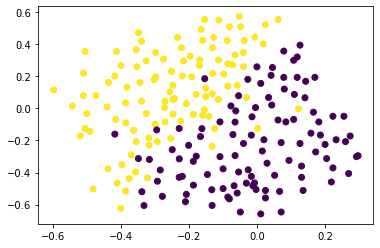

In [19]:
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

In [20]:
model = Sequential()

model.add(Dense(128, input_dim=2, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

traininglog = model.fit(x, y, epochs=500, validation_split = 0.2,verbose=1)

Epoch 1/500
6/6 [==============================] - 1s 43ms/step - loss: 0.5398 - accuracy: 0.7857 - val_loss: 0.7126 - val_accuracy: 0.5814
Epoch 2/500
6/6 [==============================] - 0s 11ms/step - loss: 0.2940 - accuracy: 0.8690 - val_loss: 0.5783 - val_accuracy: 0.7209
Epoch 3/500
6/6 [==============================] - 0s 10ms/step - loss: 0.2393 - accuracy: 0.8929 - val_loss: 0.2849 - val_accuracy: 0.9302
Epoch 4/500
6/6 [==============================] - 0s 10ms/step - loss: 0.2587 - accuracy: 0.9226 - val_loss: 0.3379 - val_accuracy: 0.9070
Epoch 5/500
6/6 [==============================] - 0s 10ms/step - loss: 0.2374 - accuracy: 0.8810 - val_loss: 0.4342 - val_accuracy: 0.8140
Epoch 6/500
6/6 [==============================] - 0s 10ms/step - loss: 0.2130 - accuracy: 0.9167 - val_loss: 0.4432 - val_accuracy: 0.8140
Epoch 7/500
6/6 [==============================] - 0s 10ms/step - loss: 0.2121 - accuracy: 0.9226 - val_loss: 0.3987 - val_accuracy: 0.8140
Epoch 8/500
6/6 [===

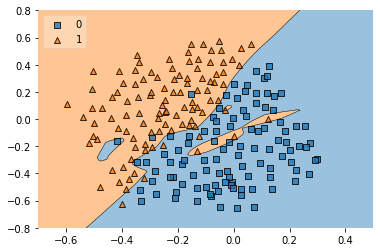

In [21]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x, y.astype('int'), clf=model, legend=2)
plt.xlim(-0.7,0.5)
plt.ylim(-0.8,0.8)
plt.show()

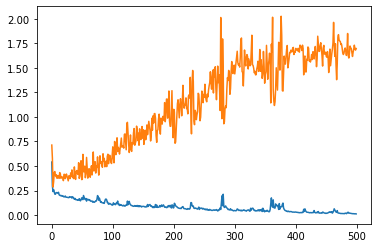

In [22]:
plt.plot(traininglog.history['loss'])
plt.plot(traininglog.history['val_loss'])

In [23]:
model = Sequential()

model.add(Dense(128, input_dim=2, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

traininglog = model.fit(x, y, epochs=500, validation_split = 0.2,verbose=1)

Epoch 1/500
6/6 [==============================] - 1s 41ms/step - loss: 0.5716 - accuracy: 0.7619 - val_loss: 0.6292 - val_accuracy: 0.6047
Epoch 2/500
6/6 [==============================] - 0s 10ms/step - loss: 0.2967 - accuracy: 0.8869 - val_loss: 0.7077 - val_accuracy: 0.6744
Epoch 3/500
6/6 [==============================] - 0s 11ms/step - loss: 0.2404 - accuracy: 0.8929 - val_loss: 0.5574 - val_accuracy: 0.7442
Epoch 4/500
6/6 [==============================] - 0s 9ms/step - loss: 0.1953 - accuracy: 0.9226 - val_loss: 0.3499 - val_accuracy: 0.8605
Epoch 5/500
6/6 [==============================] - 0s 10ms/step - loss: 0.2915 - accuracy: 0.8988 - val_loss: 0.3068 - val_accuracy: 0.8837
Epoch 6/500
6/6 [==============================] - 0s 10ms/step - loss: 0.2516 - accuracy: 0.8869 - val_loss: 0.3403 - val_accuracy: 0.8605
Epoch 7/500
6/6 [==============================] - 0s 10ms/step - loss: 0.3180 - accuracy: 0.8810 - val_loss: 0.3639 - val_accuracy: 0.8605
Epoch 8/500
6/6 [====

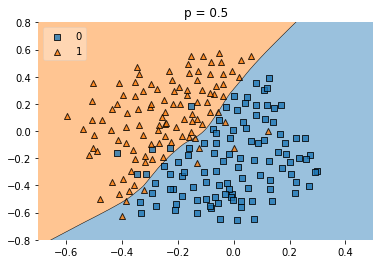

In [24]:
plot_decision_regions(x, y.astype('int'), clf=model, legend=2)
plt.xlim(-0.7,0.5)
plt.ylim(-0.8,0.8)
plt.title('p = 0.5')
plt.show()

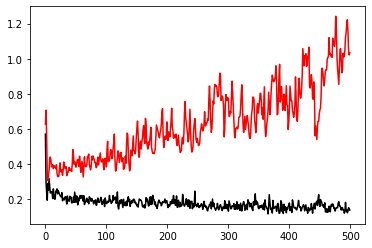

In [25]:
plt.plot(traininglog.history['loss'], color = 'black', label = 'Loss')
plt.plot(traininglog.history['val_loss'], color = 'red', label = 'Loss')

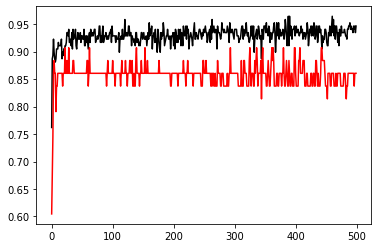

In [26]:
plt.plot(traininglog.history['accuracy'], color = 'black', label = 'Loss')
plt.plot(traininglog.history['val_accuracy'], color = 'red', label = 'Loss')